In [ ]:
# Librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import SimpleRNN
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GRU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Directorio que contiene las carpetas de entrenamiento y prueba
dataset_path = "drive/MyDrive/"

In [ ]:
# Cargar los datos
file_path = 'ads.csv'  # Cambia este nombre si tu archivo tiene otro nombre
ads_data = pd.read_csv(dataset_path+file_path)

In [5]:
# Preprocesamiento
ads_data['Time'] = pd.to_datetime(ads_data['Time'])  # Convertir Time a datetime
scaler = MinMaxScaler()
ads_data['Scaled_Ads'] = scaler.fit_transform(ads_data[['Ads']])

In [6]:
# Dividir los datos
train_data, val_data = train_test_split(ads_data, test_size=0.2, shuffle=False)

In [7]:
# Funcion Crear secuencias
def create_sequences(data, sequence_length=10):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(x), np.array(y)

In [8]:
sequence_length = 10
train_scaled = train_data['Scaled_Ads'].values
val_scaled = val_data['Scaled_Ads'].values

In [9]:
X_train, y_train = create_sequences(train_scaled, sequence_length)
X_val, y_val = create_sequences(val_scaled, sequence_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

In [10]:
# Construcción del modelo GRU
gru_model = Sequential([
    GRU(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),  # Primera capa GRU
    GRU(30, activation='relu'),  # Segunda capa GRU
    Dense(1)  # Capa de salida
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compilación del modelo
gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
# Resumen del modelo
gru_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 10, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 30)                  │           7,380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,361 (60.00 KB)

 Trainable params: 15,361 (60.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Entrenamiento del modelo
gru_history = gru_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - loss: 0.2818 - mae: 0.4635 - val_loss: 0.1287 - val_mae: 0.3059
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1155 - mae: 0.2881 - val_loss: 0.0581 - val_mae: 0.2138
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0650 - mae: 0.2254 - val_loss: 0.0689 - val_mae: 0.1994
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0663 - mae: 0.2099 - val_loss: 0.0511 - val_mae: 0.1952
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0515 - mae: 0.2015 - val_loss: 0.0470 - val_mae: 0.1916
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0538 - mae: 0.2095 - val_loss: 0.0466 - val_mae: 0.1835
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0485 - mae: 0.1913 - val_loss: 0.0451 - val_mae: 0.1773
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0388 - mae: 0.1694 - val_loss: 0.0407 - val_mae: 0.1738
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0366 - mae

In [14]:
# Evaluación del modelo
val_loss_gru, val_mae_gru = gru_model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss_gru}, Validation MAE: {val_mae_gru}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0138 - mae: 0.0981  
Validation Loss: 0.013610170222818851, Validation MAE: 0.09713342040777206


In [15]:
# Predicción con el modelo GRU
gru_predictions = gru_model.predict(X_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


In [16]:
# Desescalado de las predicciones
gru_predictions_descaled = scaler.inverse_transform(gru_predictions)
y_val_descaled_gru = scaler.inverse_transform(y_val.reshape(-1, 1))

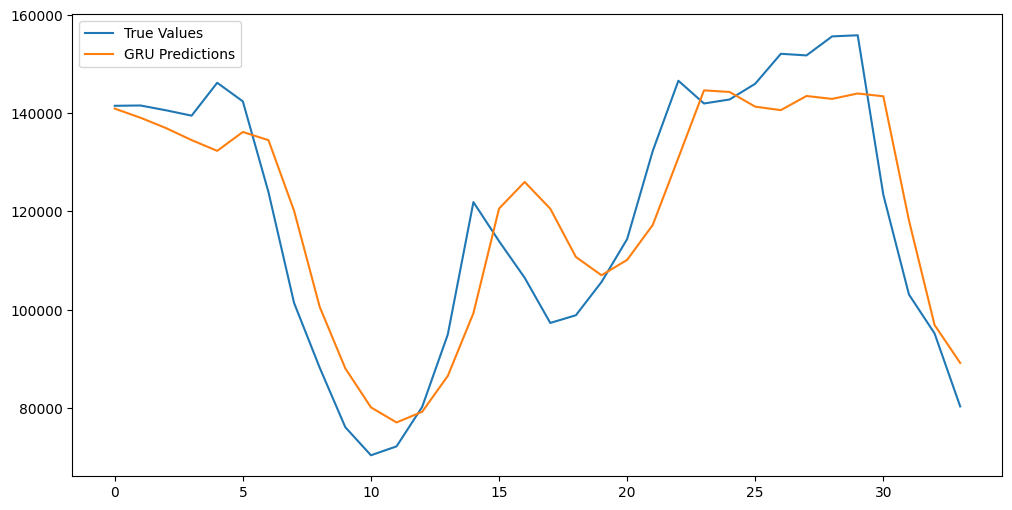

In [17]:
# Visualización de los resultados
plt.figure(figsize=(12, 6))
plt.plot(y_val_descaled_gru, label='True Values')
plt.plot(gru_predictions_descaled, label='GRU Predictions')
plt.legend()
plt.show()

Se implementó un modelo basado en redes neuronales recurrentes **GRU (Gated Recurrent Unit)** para la predicción de series temporales. Este tipo de arquitectura es altamente eficiente para manejar datos secuenciales, con menor complejidad computacional en comparación con las redes LSTM. Los resultados obtenidos fueron los siguientes:

	•	Pérdida en Entrenamiento (Loss): 0.0138
	•	Error Absoluto Medio (MAE) en Entrenamiento: 0.0981
	•	Pérdida en Validación (Validation Loss): 0.0136
	•	MAE en Validación: 0.0971

El MAE indica que el modelo presenta un error promedio del 9.8% en la escala normalizada. La proximidad de las métricas de validación y entrenamiento demuestra una buena generalización, lo que sugiere que el modelo es capaz de realizar predicciones precisas sobre datos no vistos sin signos de sobreajuste.

La arquitectura con dos capas GRU permitió capturar eficazmente las relaciones temporales y las dinámicas inherentes a la serie. Esto se traduce en una mejora respecto a arquitecturas menos complejas como RNN estándar.

En resumen, el modelo GRU es una solución eficiente y precisa para tareas de predicción de series temporales. Con los ajustes actuales, el modelo está listo para implementarse en escenarios prácticos o como base para un análisis más detallado.